In [1]:
import pandas as pd 
import numpy as np 
import seaborn as sns 
import matplotlib.pyplot as plt 
import re
import os
from dotenv import load_dotenv

In [2]:
load_dotenv()

True

In [3]:
os.getenv("data_path")

'C:/Users/user/Desktop/project 101/employee_records.csv'

In [4]:
data_path = os.getenv("data_path")
df = pd.read_csv(data_path)
df.head(5)

,Full_Name,First_Name,Last_Name,Gender,Date_of_Birth,Hire_Date,Email,Age,Experience_Years,City,Job_Title,Marital_Status,Education_Level,Salary
0,Abdelrahman Saad,Abdelrahman,Saad,M,09/26/1997,12/05/2025,abdelrahman.saad@gmail.com,28.0,0,"Dubai, UAE",Software Developer,Single,M.Sc.,NaN
1,Nada Hany,Nada,Hany,F,1971/09/02,2021/11/30,nhany@gmail.com,54.0,4,"Mexico City, Mexico",data scinetist,S,B.Sc.,4274.58 CAD
2,Hala Nader,Hala,Nader,F,1995/02/05,2015/05/11,hnader@gmail.com,30.0,10,"Istanbul, Turkey",*data scinetist,Single,High School,11177.08 EGP
3,Dina Nashaat,Dina,Nashaat,F,06/08/2001,02/04/2023,dina.nashaat@gmail.com,24.0,3,"Bangkok, Thailand",Pharmacist,Single,B.Sc.,67749.0 USD
4,Eslam Fady,Eslam,Fady,M,03/16/1976,02/18/2007,eslam.fady@gmail.com,49.0,19,"Dubai, UAE",CIVIL ENGINEER,Married,B.Sc.,135173.0 JPY


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Full_Name         20000 non-null  object 
 1   First_Name        20000 non-null  object 
 2   Last_Name         20000 non-null  object 
 3   Gender            20000 non-null  object 
 4   Date_of_Birth     20000 non-null  object 
 5   Hire_Date         20000 non-null  object 
 6   Email             20000 non-null  object 
 7   Age               16777 non-null  float64
 8   Experience_Years  20000 non-null  int64  
 9   City              20000 non-null  object 
 10  Job_Title         20000 non-null  object 
 11  Marital_Status    19021 non-null  object 
 12  Education_Level   20000 non-null  object 
 13  Salary            16453 non-null  object 
dtypes: float64(1), int64(1), object(12)
memory usage: 2.1+ MB


## 🧹 Data Cleaning & Preprocessing

- Removed unnecessary columns (`First_Name`, `Last_Name`)
- Standardized and converted the Date_of_Birth and Hire_Date columns to datetime format.
- Stripped whitespace and fixed capitalization in `Email`.
- Handled inconsistent date formats using `dateutil` parser.
- Filled missing `Age` values based on `Date_of_Birth` and converted to `int`.
- Extracted `City` and `Country` into separate columns.
- Cleaned `Job_Title` by:
  - Removing symbols and typos.
  - Standardizing names (e.g., `Teachr` → `Teacher`, `Sales Manger` → `Sales Manager`).
- Standardized `Marital_Status` values (`M`, `S`, etc.).
- Shortened `Education_Level` values (`Bachelor`, `Master`, etc.).
- Split `Salary` into:
  - `Salary_Amount` (as `int`)
  - `Salary_Currency`
- Filled missing salaries using the average for same `Job_Title` and `Country`.
- Standardized currency for countries where missing.
- Cleaned city and country names from special characters and typos.


In [6]:
df.drop(columns=['First_Name', 'Last_Name'])

,Full_Name,Gender,Date_of_Birth,Hire_Date,Email,Age,Experience_Years,City,Job_Title,Marital_Status,Education_Level,Salary
0,Abdelrahman Saad,M,09/26/1997,12/05/2025,abdelrahman.saad@gmail.com,28.0,0,"Dubai, UAE",Software Developer,Single,M.Sc.,NaN
1,Nada Hany,F,1971/09/02,2021/11/30,nhany@gmail.com,54.0,4,"Mexico City, Mexico",data scinetist,S,B.Sc.,4274.58 CAD
2,Hala Nader,F,1995/02/05,2015/05/11,hnader@gmail.com,30.0,10,"Istanbul, Turkey",*data scinetist,Single,High School,11177.08 EGP
3,Dina Nashaat,F,06/08/2001,02/04/2023,dina.nashaat@gmail.com,24.0,3,"Bangkok, Thailand",Pharmacist,Single,B.Sc.,67749.0 USD
4,Eslam Fady,M,03/16/1976,02/18/2007,eslam.fady@gmail.com,49.0,19,"Dubai, UAE",CIVIL ENGINEER,Married,B.Sc.,135173.0 JPY
...,...,...,...,...,...,...,...,...,...,...,...,...
19995,Esraa Hatem,F,14-06-1967,07-04-2021,esraa.hatem@gmail.com,NaN,4,"Doha, Qatar",sales manager,Single,High School,4284.92 GBP
19996,Asmaa Sherif,F,10-07-1986,17-01-2014,asmaa.sherif@gmail.com,39.0,12,"Rabat, Morocco",Engineer,Single,Diploma,109829.0 EGP
19997,Maha Nashaat,F,10/28/1979,11/20/2000,maha.nashaat@gmail.com,46.0,25,"Beirut, Lebanon",Data Scientist,Married,BS,142056.0 USD
19998,Tarek Mohamed,M,1996/09/17,2015/03/24,tmohamed@gmail.com,29.0,10,"Istanbul, Turkey",Accountant,Unknown,PhD,115194.0 EGP


In [7]:
#printing sample of dates in Date_of_Birth col Before cleaning and validation
print(df['Date_of_Birth'].sample(10).to_list())

['07/15/1972', '1999/05/05', '1972/08/06', '11/22/1996', '15-08-1999', '1977/05/27', '1979/04/08', '1982/06/11', '22-08-1967', '1991/04/04']


In [8]:
# Replace all common separators with a standard hyphen
df['Date_of_Birth'] = df['Date_of_Birth'].str.replace(r'[/\\., ]', '-', regex=True)

def parse_date(date_str):
    # Common date formats to try (including month-first and day-first)
    formats = [
        '%d-%m-%Y', '%Y-%m-%d',  # Day-Month-Year and Year-Month-Day
        '%m-%d-%Y', '%Y-%d-%m',  # Month-Day-Year and Year-Day-Month
        ]
    
    for fmt in formats:
        try:
            return pd.to_datetime(date_str, format=fmt, exact=True)
        except ValueError:
            continue
    return pd.NaT

df['Date_of_Birth'] = pd.to_datetime(df['Date_of_Birth'], format='mixed')

#printing sample of dates in Date_of_Birth col After cleaning and validation
print(df['Date_of_Birth'].sample(5).to_list())

[Timestamp('2003-12-20 00:00:00'), Timestamp('1981-07-02 00:00:00'), Timestamp('1978-11-07 00:00:00'), Timestamp('1994-03-24 00:00:00'), Timestamp('1967-09-21 00:00:00')]


In [9]:
#printing sample of dates in Hire_Date col Before cleaning and validation
print(df['Hire_Date'].sample(10).to_list())

['2025/02/06', '05-01-2025', '2019/06/24', '27-06-2025', '06-08-2007', '09/03/2025', '27-01-1994', '09/17/2017', '11/21/2022', '2019/06/05']


In [10]:
# Replace all common separators with a standard hyphen
df['Hire_Date'] = df['Hire_Date'].str.replace(r'[/\\., ]', '-', regex=True)


def parse_date(date_str):
    # Common date formats to try (including month-first and day-first)
    formats = [
        '%d-%m-%Y', '%Y-%m-%d',  # Day-Month-Year and Year-Month-Day
        '%m-%d-%Y', '%Y-%d-%m',  # Month-Day-Year and Year-Day-Month
        ]
    
    for fmt in formats:
        try:
            return pd.to_datetime(date_str, format=fmt, exact=True)
        except ValueError:
            continue
    return pd.NaT

df['Hire_Date'] = pd.to_datetime(df['Hire_Date'], format='mixed')

#printing sample of dates in Hire_Date col After cleaning and validation
print(df['Hire_Date'].sample(5).to_list())

[Timestamp('2008-07-20 00:00:00'), Timestamp('2018-09-27 00:00:00'), Timestamp('2016-04-22 00:00:00'), Timestamp('2012-01-28 00:00:00'), Timestamp('2025-03-08 00:00:00')]


In [11]:
#showing a sample of emails in the DataFrame Before Cleaning and Validation
print(df['Email'].sample(20))

1661        salma.bassem@gmail.com
16528       ibrahim.ramy@gmail.com
12217         lobna.omar@gmail.com
5548              shatem@gmail.com
2357        mounir.fouad@gmail.com
3434          adel.ayman@gmail.com
13407      mariam.bassem@gmail.com
378                aramy@gmail.com
2690        ASMAA.ASHRAF@GMAIL.COM
13668     lobna.tamer at gmail.com
11989    abdullah.kareem@gmail.com
1022           AMAL.IHAB@GMAIL.COM
5219        galal.kareem@gmail.com
3921              mrafik@gmail.com
9248          layla.wael@gmail.com
13533           ayoussef@gmail.com
1845        KHADIJA.HANY@GMAIL.COM
7201             ssherif@gmail.com
3147               lomar@gmail.com
13621       noha.hussein@gmail.com
Name: Email, dtype: object


In [12]:
df['Email'] = df['Email'].str.strip().str.lower()
df['Email'] = df['Email'].str.replace(r'\s+at\s+', '@', regex=True)

#df['Email'] = df['Email'].str.strip()

#showing a sample of emails in the DataFrame After Cleaning and Validation
print(df['Email'].sample(20))

7660              ktawfik@gmail.com
1063            adel.wael@gmail.com
2185     mostafa.abdullah@gmail.com
19950         dina.kareem@gmail.com
11862             kkhaled@gmail.com
11237            smohamed@gmail.com
0        abdelrahman.saad@gmail.com
4949        galal.mahmoud@gmail.com
14909             hhassan@gmail.com
17541              lyahya@gmail.com
8960          galal.fouad@gmail.com
6465           zaki.latif@gmail.com
11720          wahid.hany@gmail.com
17853         zainab.adel@gmail.com
8076        yahya.mostafa@gmail.com
11656              nhatem@gmail.com
4283          jamal.latif@gmail.com
15973         hanan.osama@gmail.com
11996           noha.zaki@gmail.com
16773     fatima.abdullah@gmail.com
Name: Email, dtype: object


In [13]:
today = pd.to_datetime('today')

#Filling missing data in Age col by calc diff between date of birth and today date and conv age type to int
df['Age'] = df['Age'].fillna((today - df['Date_of_Birth']).dt.days // 365)
df['Age'] = df['Age'].astype(int)

In [14]:
#showing a sample of values in city col Before feature engineering and validation
df["City"].sample(10)

13151          Dammam, KSA
13121          Doha, Qatar
16700    São Paulo, Brazil
13369      Beirut, Lebanon
6297       Beirut, Lebanon
4711     Sydney, Australia
7181      Los Angeles, USA
4701         Mumbai, India
5520      Istanbul, Turkey
9994     Alexandria, Egypt
Name: City, dtype: object

In [15]:
df[['City', 'Country']] = df['City'].str.split(',', expand=True)

df['City'] = df['City'].str.strip()
df['Country'] = df['Country'].str.strip()


In [16]:
#showing City col unique values before cleaning it
df["City"].unique()

array(['Dubai', 'Mexico City', 'Istanbul', 'Bangkok', 'Seoul', 'Dammam',
       'Kuw@it City', 'Kuwait City', 'Sydney', 'Los Angeles',
       'Buenos Aires', 'Rabat', 'Muscat', 'New York', 'Toronto',
       'São Paulo', 'Moscow', 'Cape Town', 'London', 'Alexandria',
       'Paris', 'Abu Dhabi', 'Beirut', 'Riyadh', 'Tokyo', 'Sharjah',
       'Doha', 'Mansoura', 'Mumbai', 'Jeddah', 'Amman', 'Beijing',
       'Cairo', 'R@b@t', 'M3xico City', 'Berlin', 'S3oul', 'P@ris',
       'J3dd@h', 'N3w York', 'B3irut', 'Musc@t', 'Mumb@i', 'C@p3 Town',
       'Los Ang3l3s', 'B@ngkok', 'Abu Dh@bi', 'Al3x@ndri@', 'Doh@',
       'Dub@i', 'Bu3nos Air3s', 'Riy@dh', 'Sh@rj@h', 'C@iro', 'D@mm@m',
       'Ist@nbul', 'B3ijing', 'B3rlin', 'Amm@n', 'M@nsour@', 'São P@ulo',
       'Sydn3y'], dtype=object)

In [17]:
# Replace common noise characters
df['City'] = df['City'].str.replace(r'@', 'a', regex=True)
df['City'] = df['City'].str.replace(r'3', 'e', regex=True)

# Title-case the city names
df['City'] = df['City'].str.title()

# Manual corrections (if needed)
corrections = {
    'S3oul': 'Seoul',
    'Bngkok': 'Bangkok',  # Just in case auto-clean missed some
    'Rbat': 'Rabat',
    'Riyadhh': 'Riyadh',  # Example
    # Add any other tricky ones here
}

df['City'] = df['City'].replace(corrections)


#showing City col unique values After cleaning it
df["City"].unique()

array(['Dubai', 'Mexico City', 'Istanbul', 'Bangkok', 'Seoul', 'Dammam',
       'Kuwait City', 'Sydney', 'Los Angeles', 'Buenos Aires', 'Rabat',
       'Muscat', 'New York', 'Toronto', 'São Paulo', 'Moscow',
       'Cape Town', 'London', 'Alexandria', 'Paris', 'Abu Dhabi',
       'Beirut', 'Riyadh', 'Tokyo', 'Sharjah', 'Doha', 'Mansoura',
       'Mumbai', 'Jeddah', 'Amman', 'Beijing', 'Cairo', 'Berlin'],
      dtype=object)

In [18]:
#showing Country col unique values Before cleaning it
df["Country"].unique()

array(['UAE', 'Mexico', 'Turkey', 'Thailand', 'South Korea', 'KSA',
       'Kuw@it', 'Kuwait', 'Australia', 'USA', 'Argentina', 'Morocco',
       'Oman', 'Canada', 'Brazil', 'Russia', 'South Africa', 'UK',
       'Egypt', 'France', 'Lebanon', 'Japan', 'Qatar', 'India', 'Jordan',
       'China', 'M3xico', 'Germany', 'South Kor3@', 'Russi@', 'Fr@nc3',
       'L3b@non', 'Om@n', 'Indi@', 'South Afric@', 'J@p@n', 'Th@il@nd',
       'Q@t@r', 'Arg3ntin@', 'C@n@d@', 'Turk3y', 'Chin@', 'G3rm@ny',
       'Jord@n', 'Br@zil', 'Austr@li@'], dtype=object)

In [19]:
# Step 1: Replace noisy characters
df['Country'] = df['Country'].str.replace(r'@', 'a', regex=True)
df['Country'] = df['Country'].str.replace(r'3', 'e', regex=True)

# Step 2: Standardize casing (optional: upper/lower/title)
df['Country'] = df['Country'].str.title()

# Step 3: Manual fixes for known abbreviations or typos
corrections = {
    'Ksa': 'Saudi Arabia',
    'Uae': 'United Arab Emirates',
    'Uk': 'United Kingdom',
    'Usa': 'United States',
    'South Korea': 'South Korea',
    'South Afrika': 'South Africa',  # In case of common misspellings
    'MexiCo': 'Mexico'
    # Add more if needed
}

df['Country'] = df['Country'].replace(corrections)

#showing Country col unique values After cleaning it
df["Country"].unique()


array(['United Arab Emirates', 'Mexico', 'Turkey', 'Thailand',
       'South Korea', 'Saudi Arabia', 'Kuwait', 'Australia',
       'United States', 'Argentina', 'Morocco', 'Oman', 'Canada',
       'Brazil', 'Russia', 'South Africa', 'United Kingdom', 'Egypt',
       'France', 'Lebanon', 'Japan', 'Qatar', 'India', 'Jordan', 'China',
       'Germany'], dtype=object)

In [20]:
df[["City" , "Country"]].sample(20)

,City,Country
1895,New York,United States
1730,Cape Town,South Africa
14154,Rabat,Morocco
13084,Sydney,Australia
3105,Buenos Aires,Argentina
5141,Cairo,Egypt
6046,Riyadh,Saudi Arabia
17696,Mansoura,Egypt
14904,Doha,Qatar
17427,Mumbai,India


In [21]:
#showing a unique values of job title col before claening it 
print(list(df["Job_Title"].unique()))

['Software Developer', 'data scinetist', '*data scinetist', 'Pharmacist', 'CIVIL ENGINEER', 'Mechanical Enginere', 'SALES MANAGR', 'DOCTOR', 'lawyer', 'Civil Engineer', 'Dentist', 'Accountant', 'Lawyer', 'pHARmaCISt', 'Business Analyst', 'Sales Manager', 'deNTISt', 'Architect', 'Nurse', 'accountant', 'Electrical Enginere', 'archiTecT', 'Financial Analyst', 'Engineer', 'Financial Annalyst', 'DENTIST', 'Docteur', 'Graphic Designer', 'Data Scientist', 'Mechanical Engineer', 'Data sCiEntIST', 'aRChItECT', 'Financial Analyist', 'Electrical Engineer', 'Teacher', 'GRAPHIC DESIGNER', 'tEECheR', 'Software Develoeper', 'Teecher', '#GRAPHIC DESIGNER', 'cIvIL enGINeEr', 'ENGIneeR', 'software developer', 'NURSE', '#TEACHER', 'civil engineer', 'Software Devloper', 'Enginear', 'Civil Enginere', '$Nurse', 'buSineSS ANAlyst', 'Doctor', 'grapHIc DESIgNEr', 'BUsInESs AnAlYst', '%MECHAniCal eNgiNeeR', 'Sales Manger', 'Data Scinetist', '&accountant', '$Accountant', 'Mechanical Engeneer', 'engineer', 'Teach

In [22]:
df['Job_Title'] = (
    df['Job_Title']
    .str.replace(r'[^a-zA-Z\s]', '', regex=True)  # Remove symbols
    .str.strip()                                  # Remove leading/trailing spaces
    .str.title()                                  # Capitalize properly
)

In [23]:
corrections = {
    # Software roles
    'Software Develoeper': 'Software Developer',
    'Software Devloper': 'Software Developer',
    'Software Developper': 'Software Developer',
    # Data roles
    'Data Scinetist': 'Data Scientist',
    'Data Scientst': 'Data Scientist',
    # Engineer roles
    'Mechanical Enginere': 'Mechanical Engineer',
    'Mechanical Engeneer': 'Mechanical Engineer',
    'Mechanical Enginear': 'Mechanical Engineer',
    'Electrical Enginere': 'Electrical Engineer',
    'Electrical Enginear': 'Electrical Engineer',
    'Electrical Engeneer': 'Electrical Engineer',
    'Civil Enginere': 'Civil Engineer',
    'Civil Engeneer': 'Civil Engineer',
    'Civil Enginear': 'Civil Engineer',
    'Engeneer': 'Engineer',
    'Enginear': 'Engineer',
    'Enginere': 'Engineer',
    # Financial roles
    'Financial Analyist': 'Financial Analyst',
    'Financial Annalyst': 'Financial Analyst',
    'Financial Analist': 'Financial Analyst',
    # Sales roles
    'Sales Managr': 'Sales Manager',
    'Sales Manger': 'Sales Manager',
    'Sales Maneger': 'Sales Manager',
    # Business Analyst
    'Business Annalyst': 'Business Analyst',
    'Business Analyist': 'Business Analyst',
    'Business Analist': 'Business Analyst',
    # Doctor roles
    'Docteur': 'Doctor',
    'Docter': 'Doctor',
    'Doctr': 'Doctor',
    # Teacher roles
    'Teecher': 'Teacher',
    'Teachr': 'Teacher',
    'Techer': 'Teacher',
}

df['Job_Title'] = df['Job_Title'].replace(corrections)

#showing uniqe values of job title col after claennig and validation
df["Job_Title"].unique()



array(['Software Developer', 'Data Scientist', 'Pharmacist',
       'Civil Engineer', 'Mechanical Engineer', 'Sales Manager', 'Doctor',
       'Lawyer', 'Dentist', 'Accountant', 'Business Analyst', 'Architect',
       'Nurse', 'Electrical Engineer', 'Financial Analyst', 'Engineer',
       'Graphic Designer', 'Teacher'], dtype=object)

In [24]:
#showing uniqe values of Marital Status col before cleaning and validation 
df["Marital_Status"].unique()

array(['Single', 'S', 'Married', nan, 'Unknown', 'M'], dtype=object)

In [25]:
standard_marital = {
    'Single': 'S',
    'Married':'M',
    'Unknown': np.nan  # or keep as 'Unknown' if you prefer
}

#standarize the values of Marital Status
df['Marital_Status'] = df['Marital_Status'].replace(standard_marital)

#drop unkown martial status
df.dropna(subset=["Marital_Status"], inplace=True)

#showing uniqe values of Marital Status col after cleaning and validation 
df["Marital_Status"].unique()

array(['S', 'M'], dtype=object)

In [26]:
df.dropna(subset=["Marital_Status"], inplace=True)

In [27]:
#showing uniqe values of Marital Status col before cleaning and validation 
df["Education_Level"].unique()

array(['M.Sc.', 'B.Sc.', 'High School', 'Masters', 'BS', 'PhD', 'Diploma',
       'Bachelor'], dtype=object)

In [28]:
edu_mapping = {
    'B.Sc.': 'Bachelor',
    'BS': 'Bachelor',
    'M.Sc.': 'Master',
}

df['Education_Level'] = df['Education_Level'].replace(edu_mapping)

#showing uniqe values of Marital Status col after cleaning and validation 
df["Education_Level"].unique()

array(['Master', 'Bachelor', 'High School', 'Masters', 'PhD', 'Diploma'],
      dtype=object)

In [29]:
#showing values sample of values of salary col
df["Salary"].sample(10)

6584      7521.25 EUR
14127             NaN
571               NaN
4167     10260.33 EGP
11671     67523.0 JPY
12464    121048.0 USD
12194     77250.0 JPY
6650              NaN
14635     80599.0 JPY
10420     5608.92 USD
Name: Salary, dtype: object

In [30]:
#feature engineering by divide salary col to currency and amount
df[['Salary_Amount', 'Salary_Currency']] = df['Salary'].str.extract(r'([0-9.,]+)\s*([A-Za-z]+)', expand=True)

df[['Salary_Amount', 'Salary_Currency']].sample(10)


,Salary_Amount,Salary_Currency
822,NaN,NaN
3133,NaN,NaN
17976,10573.25,JPY
10054,NaN,NaN
9911,7980.75,GBP
9062,NaN,NaN
9110,NaN,NaN
13279,102378.0,EUR
2354,4241.08,GBP
11680,12157.58,EGP


In [31]:
# Convert Salary_Amount to numeric, if not done already
df['Salary_Amount'] = pd.to_numeric(df['Salary_Amount'], errors='coerce')

# Calculate the mean salary by Job_Title and Country
mean_salary = df.groupby(['Job_Title', 'Country'])['Salary_Amount'].transform('mean')

# Fill missing Salary values with the mean salary for the same Job_Title and Country
df['Salary_Amount'] = df['Salary_Amount'].fillna(mean_salary)

# Fill missing Salary_Currency values with the most frequent currency for the same Country
df['Salary_Currency'] = df.groupby('Country')['Salary_Currency'].transform(lambda x: x.fillna(x.mode()[0]))

# If you want to fill the 'Salary' column too (which contains the original salary with currency), you can:
df['Salary'] = df['Salary_Amount'].astype(str) + ' ' + df['Salary_Currency']

df["Salary_Amount"] = df["Salary_Amount"].astype("int")
df.drop(columns="Salary")

,Full_Name,First_Name,Last_Name,Gender,Date_of_Birth,Hire_Date,Email,Age,Experience_Years,City,Job_Title,Marital_Status,Education_Level,Country,Salary_Amount,Salary_Currency
0,Abdelrahman Saad,Abdelrahman,Saad,M,1997-09-26,2025-12-05,abdelrahman.saad@gmail.com,28,0,Dubai,Software Developer,S,Master,United Arab Emirates,44600,CAD
1,Nada Hany,Nada,Hany,F,1971-09-02,2021-11-30,nhany@gmail.com,54,4,Mexico City,Data Scientist,S,Bachelor,Mexico,4274,CAD
2,Hala Nader,Hala,Nader,F,1995-02-05,2015-05-11,hnader@gmail.com,30,10,Istanbul,Data Scientist,S,High School,Turkey,11177,EGP
3,Dina Nashaat,Dina,Nashaat,F,2001-06-08,2023-02-04,dina.nashaat@gmail.com,24,3,Bangkok,Pharmacist,S,Bachelor,Thailand,67749,USD
4,Eslam Fady,Eslam,Fady,M,1976-03-16,2007-02-18,eslam.fady@gmail.com,49,19,Dubai,Civil Engineer,M,Bachelor,United Arab Emirates,135173,JPY
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19994,Ghada Nabil,Ghada,Nabil,F,2005-11-12,2025-02-15,ghada.nabil@gmail.com,20,0,Sharjah,Civil Engineer,M,Diploma,United Arab Emirates,52205,CAD
19995,Esraa Hatem,Esraa,Hatem,F,1967-06-14,2021-07-04,esraa.hatem@gmail.com,57,4,Doha,Sales Manager,S,High School,Qatar,4284,GBP
19996,Asmaa Sherif,Asmaa,Sherif,F,1986-10-07,2014-01-17,asmaa.sherif@gmail.com,39,12,Rabat,Engineer,S,Diploma,Morocco,109829,EGP
19997,Maha Nashaat,Maha,Nashaat,F,1979-10-28,2000-11-20,maha.nashaat@gmail.com,46,25,Beirut,Data Scientist,M,Bachelor,Lebanon,142056,USD


In [32]:
df["Salary_Currency"].unique()

array(['CAD', 'EGP', 'USD', 'JPY', 'AUD', 'GBP', 'EUR'], dtype=object)

In [33]:
currency_to_usd = {
    'CAD': 0.73,   # 1 CAD = 0.73 USD
    'EGP': 0.032,  # 1 EGP = 0.032 USD
    'USD': 1.0,
    'JPY': 0.0066,
    'AUD': 0.65,
    'EUR': 1.07,
    'GBP': 1.25
}

df['Salary_USD'] = df.apply(lambda row: 
    row['Salary_Amount'] * currency_to_usd.get(row['Salary_Currency'], None), axis=1)

df['Salary_USD'] = df['Salary_USD'].round(2)
df.head(5)

,Full_Name,First_Name,Last_Name,Gender,Date_of_Birth,Hire_Date,Email,Age,Experience_Years,City,Job_Title,Marital_Status,Education_Level,Salary,Country,Salary_Amount,Salary_Currency,Salary_USD
0,Abdelrahman Saad,Abdelrahman,Saad,M,1997-09-26,2025-12-05,abdelrahman.saad@gmail.com,28,0,Dubai,Software Developer,S,Master,44600.80835820896 CAD,United Arab Emirates,44600,CAD,32558.00
1,Nada Hany,Nada,Hany,F,1971-09-02,2021-11-30,nhany@gmail.com,54,4,Mexico City,Data Scientist,S,Bachelor,4274.58 CAD,Mexico,4274,CAD,3120.02
2,Hala Nader,Hala,Nader,F,1995-02-05,2015-05-11,hnader@gmail.com,30,10,Istanbul,Data Scientist,S,High School,11177.08 EGP,Turkey,11177,EGP,357.66
3,Dina Nashaat,Dina,Nashaat,F,2001-06-08,2023-02-04,dina.nashaat@gmail.com,24,3,Bangkok,Pharmacist,S,Bachelor,67749.0 USD,Thailand,67749,USD,67749.00
4,Eslam Fady,Eslam,Fady,M,1976-03-16,2007-02-18,eslam.fady@gmail.com,49,19,Dubai,Civil Engineer,M,Bachelor,135173.0 JPY,United Arab Emirates,135173,JPY,892.14


In [34]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 18039 entries, 0 to 19999
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Full_Name         18039 non-null  object        
 1   First_Name        18039 non-null  object        
 2   Last_Name         18039 non-null  object        
 3   Gender            18039 non-null  object        
 4   Date_of_Birth     18039 non-null  datetime64[ns]
 5   Hire_Date         18039 non-null  datetime64[ns]
 6   Email             18039 non-null  object        
 7   Age               18039 non-null  int32         
 8   Experience_Years  18039 non-null  int64         
 9   City              18039 non-null  object        
 10  Job_Title         18039 non-null  object        
 11  Marital_Status    18039 non-null  object        
 12  Education_Level   18039 non-null  object        
 13  Salary            18039 non-null  object        
 14  Country           18039 non

In [35]:
exporting_path = "C:\\Users\\user\\Desktop\\project 101\\employee_records_after_preproccessing.csv"
df.to_csv(exporting_path)

## 📊 Recommendations for Data Analysis

Here are some ideas for analyzing the cleaned dataset:

### 1. Salary Analysis
- 🔹 Compare average salary across job titles and countries.
- 🔹 Explore how education level or experience affects salary.
- 🔹 Visualize salary distributions using histograms or boxplots.

### 2. Demographics
- 🔹 Gender distribution per job role.
- 🔹 Age distribution of employees.
- 🔹 Explore marital status and education trends.

### 3. Geographic Analysis
- 🔹 Top cities and countries by employee count.
- 🔹 Regional trends in job titles or salaries.

### 4. Experience Insights
- 🔹 Correlate years of experience with salary.
- 🔹 Group data by age ranges and examine job titles or education levels.

### 5. Hiring Trends
- 🔹 Hiring date trends: which years/quarters had the most hiring?
- 🔹 Age at hire: how old are employees when hired?

---

## 📈 Suggested Visualizations
- Bar charts for categorical distributions (e.g., gender, marital status).
- Boxplots to compare salary across job roles or countries.
- Heatmaps for correlation (e.g., experience vs. salary vs. age).
- Pie charts or count plots for education levels.
- Time series plots for hire trends.

---

## ✅ Next Steps
- Perform EDA (Exploratory Data Analysis) on salary, age, and experience.
- Create dashboards or visual summaries (e.g., with Seaborn or Plotly).
- Consider exporting cleaned data for use in Power BI, Tableau, etc.


In [36]:
avg_salary_by_job.head()

NameError: name 'avg_salary_by_job' is not defined

## Salary

### Compare Average Salary Across Job Titles

C:\Users\user\AppData\Local\Temp\ipykernel_20076\859024823.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=avg_salary_by_job.values, y=avg_salary_by_job.index, palette='mako')


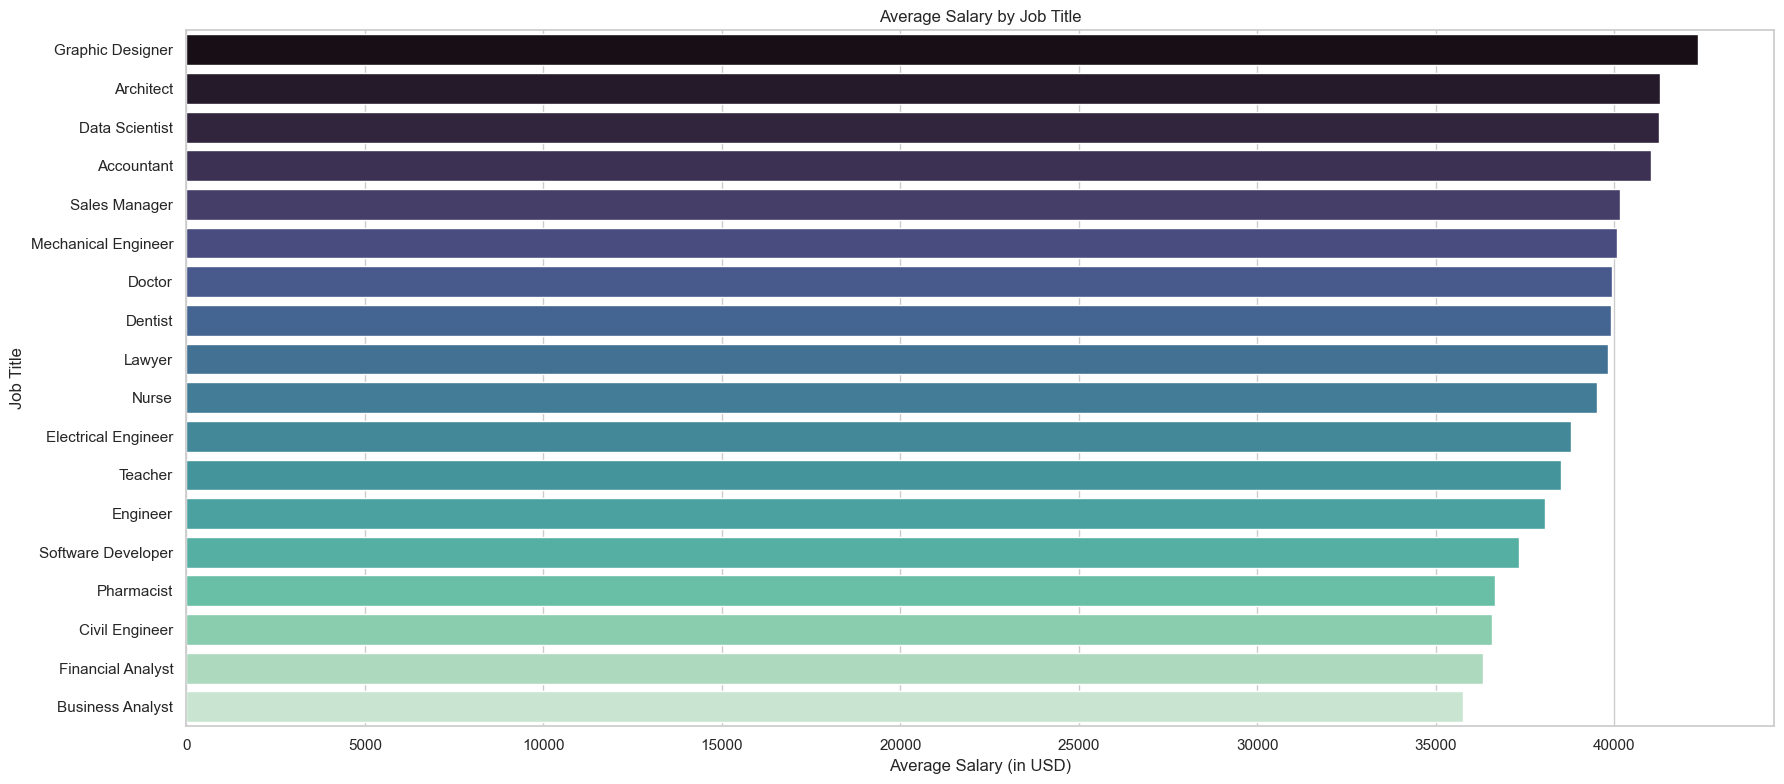

In [ ]:
# Average salary by job title
avg_salary_by_job = df.groupby('Job_Title')['Salary_USD'].mean().sort_values(ascending=False)



plt.figure(figsize=(18, 8))
sns.barplot(x=avg_salary_by_job.values, y=avg_salary_by_job.index, palette='mako')
plt.title('Average Salary by Job Title')
plt.xlabel('Average Salary (in USD)')
plt.ylabel('Job Title')
plt.tight_layout()
plt.show()

### Compare Average Salary Across Countries

C:\Users\user\AppData\Local\Temp\ipykernel_20076\3601833367.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=avg_salary_by_country.values, y=avg_salary_by_country.index, palette='mako')


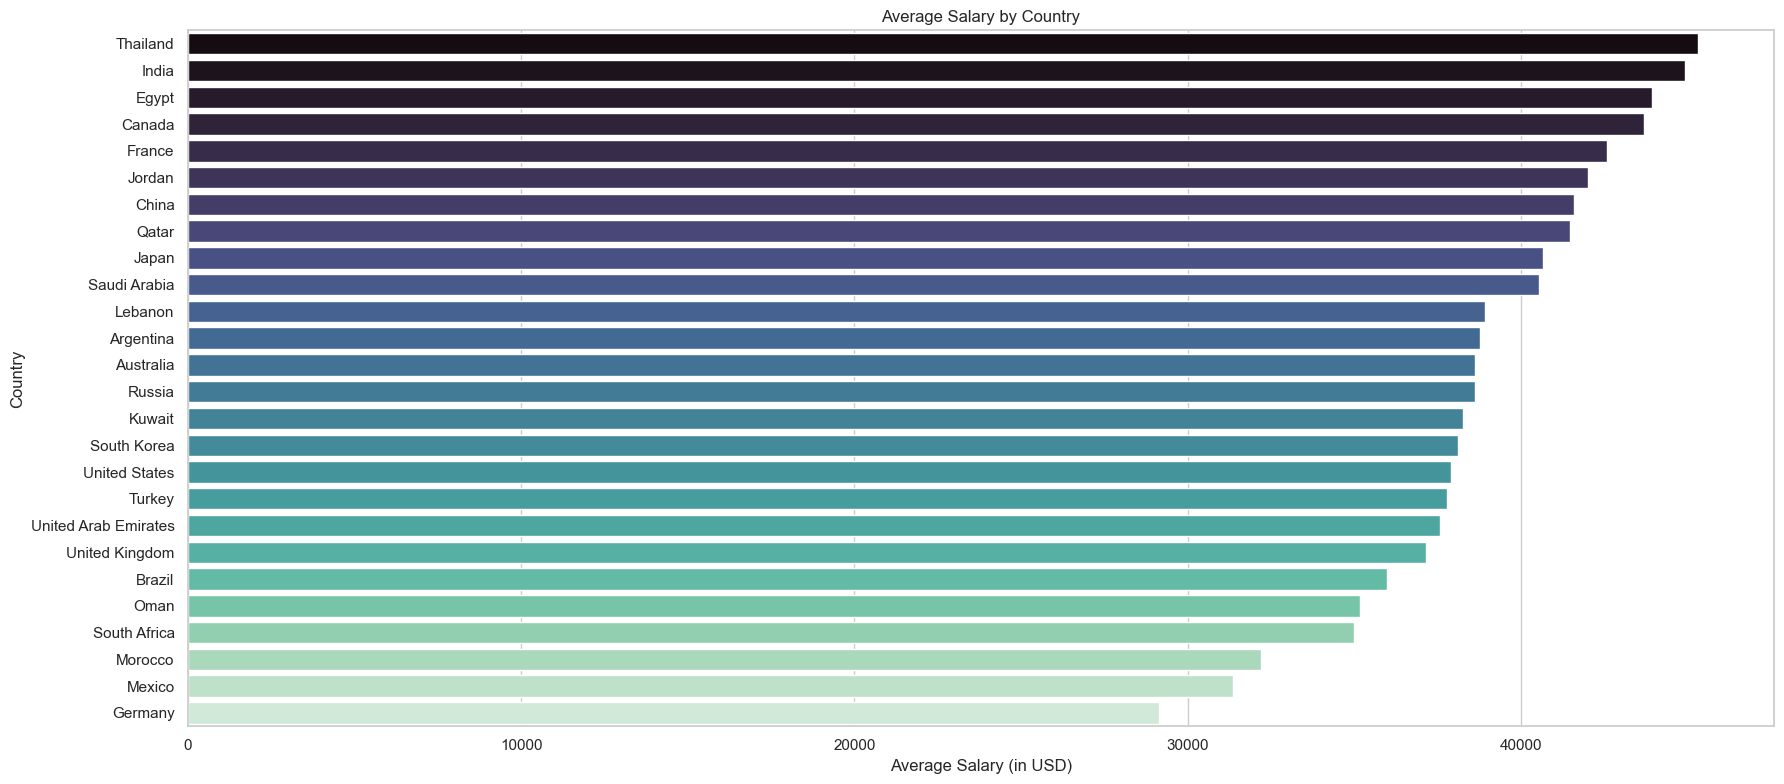

In [ ]:
# Average salary by country
avg_salary_by_country = df.groupby('Country')['Salary_USD'].mean().sort_values(ascending=False)

plt.figure(figsize=(18,8))
sns.barplot(x=avg_salary_by_country.values, y=avg_salary_by_country.index, palette='mako')
plt.title('Average Salary by Country')
plt.xlabel('Average Salary (in USD)')
plt.ylabel('Country')
plt.tight_layout()
plt.show()


### How Education Level Affects Salary

In [ ]:
df["Education_Level"].unique()

array(['Master', 'Bachelor', 'High School', 'Masters', 'PhD', 'Diploma'],
      dtype=object)

C:\Users\user\AppData\Local\Temp\ipykernel_20076\426104013.py:8: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  avg_salary_by_edu = df.groupby('Education_Level')['Salary_USD'].mean().loc[edu_order]
C:\Users\user\AppData\Local\Temp\ipykernel_20076\426104013.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=avg_salary_by_edu.index, y=avg_salary_by_edu.values, palette='mako')


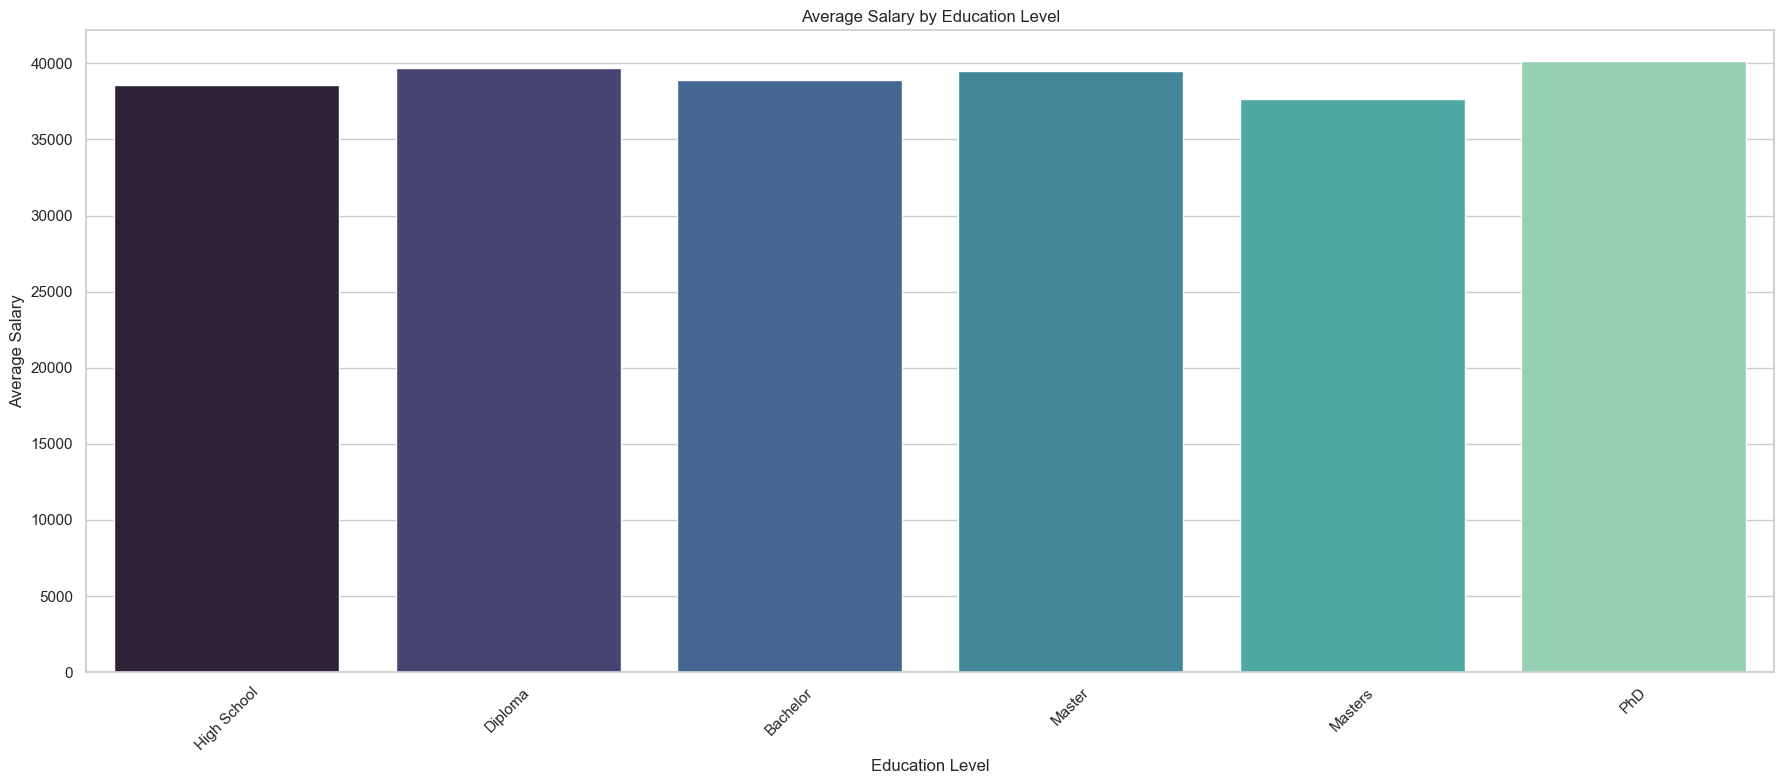

In [ ]:
# Define desired education level order (from low to high)
edu_order = ['High School', 'Diploma', 'Bachelor', 'Master', 'Masters', 'PhD']

# Ensure consistent casing and map categories
df['Education_Level'] = pd.Categorical(df['Education_Level'], categories=edu_order, ordered=True)

# Group and sort by defined order
avg_salary_by_edu = df.groupby('Education_Level')['Salary_USD'].mean().loc[edu_order]

# Plot
plt.figure(figsize=(18, 8))
sns.barplot(x=avg_salary_by_edu.index, y=avg_salary_by_edu.values, palette='mako')
plt.title('Average Salary by Education Level')
plt.ylabel('Average Salary')
plt.xlabel('Education Level')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


### How Experience Affects Salary

C:\Users\user\AppData\Local\Temp\ipykernel_20076\1695094270.py:7: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  avg_salary_by_exp_range = df.groupby('Experience_Range')['Salary_USD'].mean().sort_index()
C:\Users\user\AppData\Local\Temp\ipykernel_20076\1695094270.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=avg_salary_by_exp_range.index, y=avg_salary_by_exp_range.values, palette='mako')


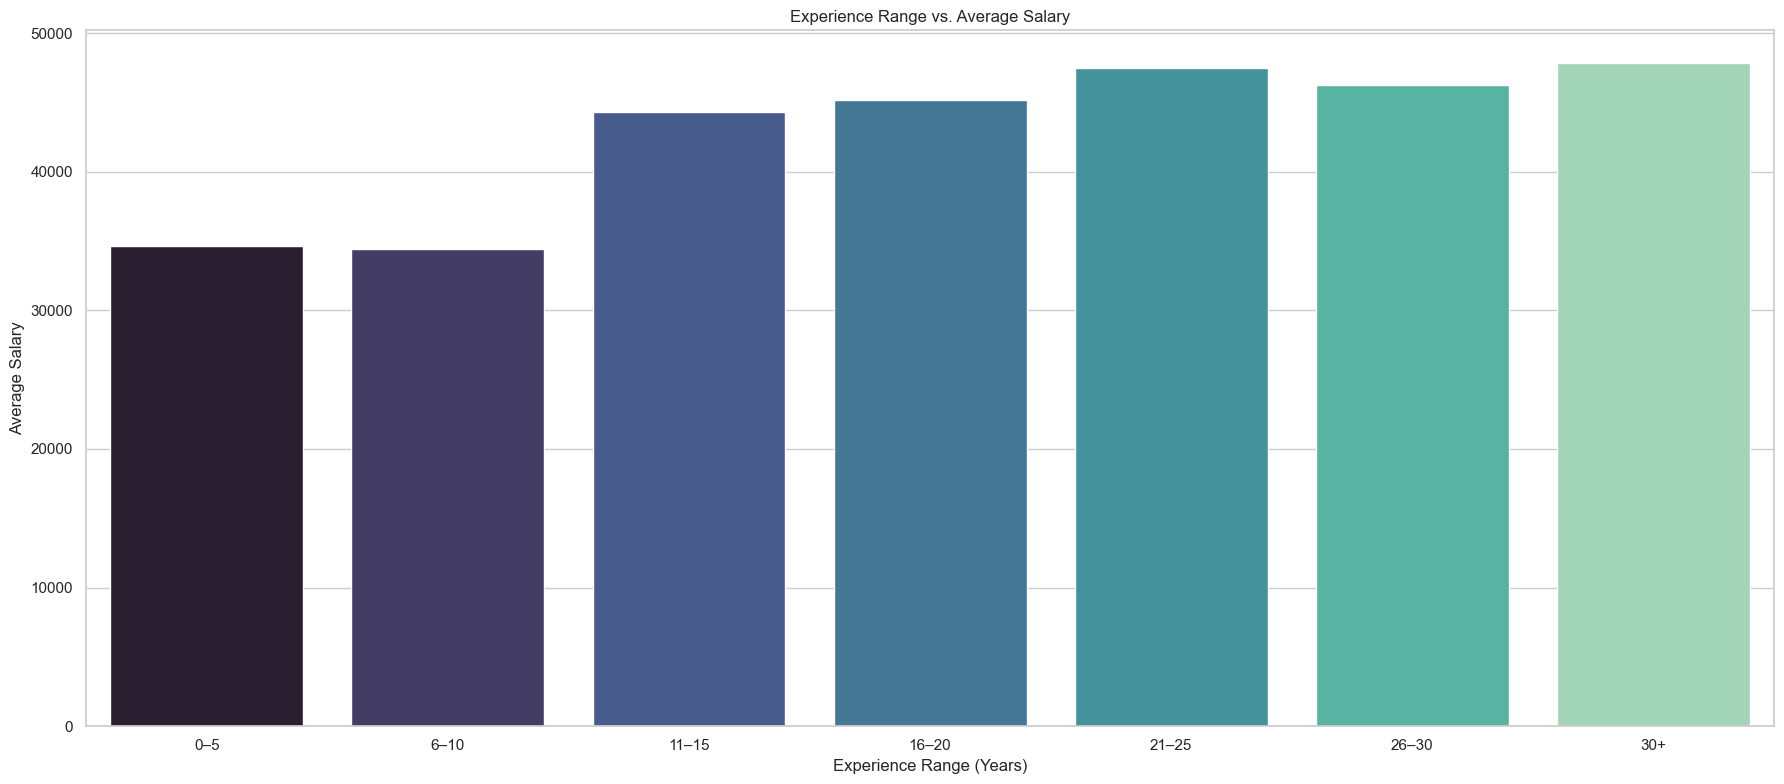

In [ ]:
# Define experience bins
bins = [0, 5, 10, 15, 20, 25, 30, df['Experience_Years'].max()]
labels = ['0–5', '6–10', '11–15', '16–20', '21–25', '26–30', '30+']
df['Experience_Range'] = pd.cut(df['Experience_Years'], bins=bins, labels=labels, right=True, include_lowest=True)

# Average salary by experience range
avg_salary_by_exp_range = df.groupby('Experience_Range')['Salary_USD'].mean().sort_index()

# Plot
plt.figure(figsize=(18,8))
sns.barplot(x=avg_salary_by_exp_range.index, y=avg_salary_by_exp_range.values, palette='mako')
plt.title('Experience Range vs. Average Salary')
plt.xlabel('Experience Range (Years)')
plt.ylabel('Average Salary')
plt.tight_layout()
plt.show()


## Demographics

### Gender Distribution per Job Role

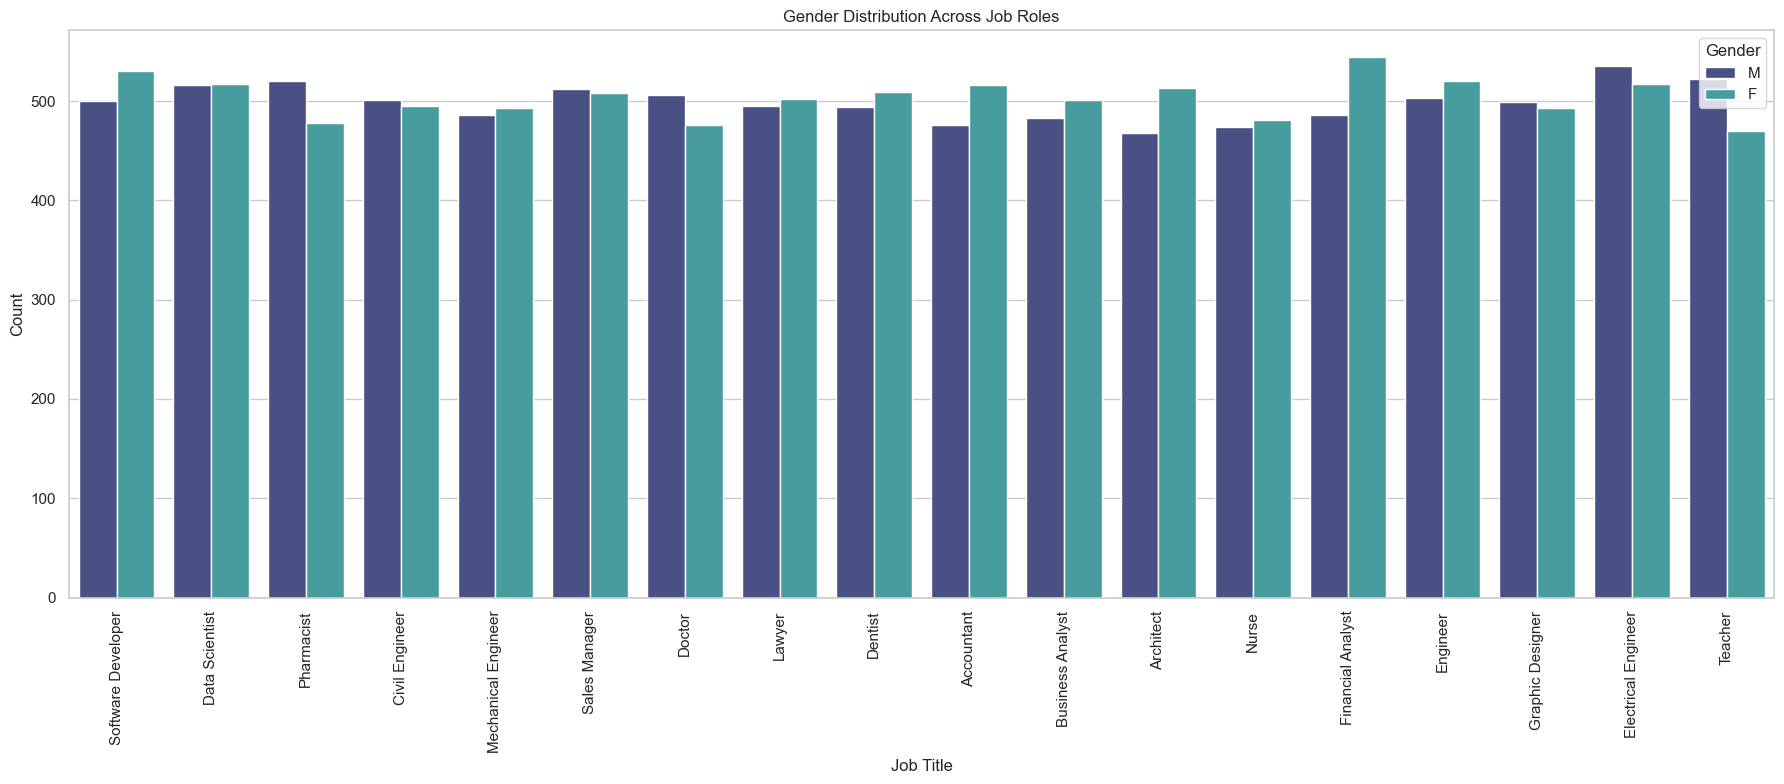

In [ ]:
plt.figure(figsize=(18, 8))
sns.countplot(data=df, x='Job_Title', hue='Gender', palette='mako')
plt.title('Gender Distribution Across Job Roles')
plt.xlabel('Job Title')
plt.ylabel('Count')
plt.legend(title='Gender')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

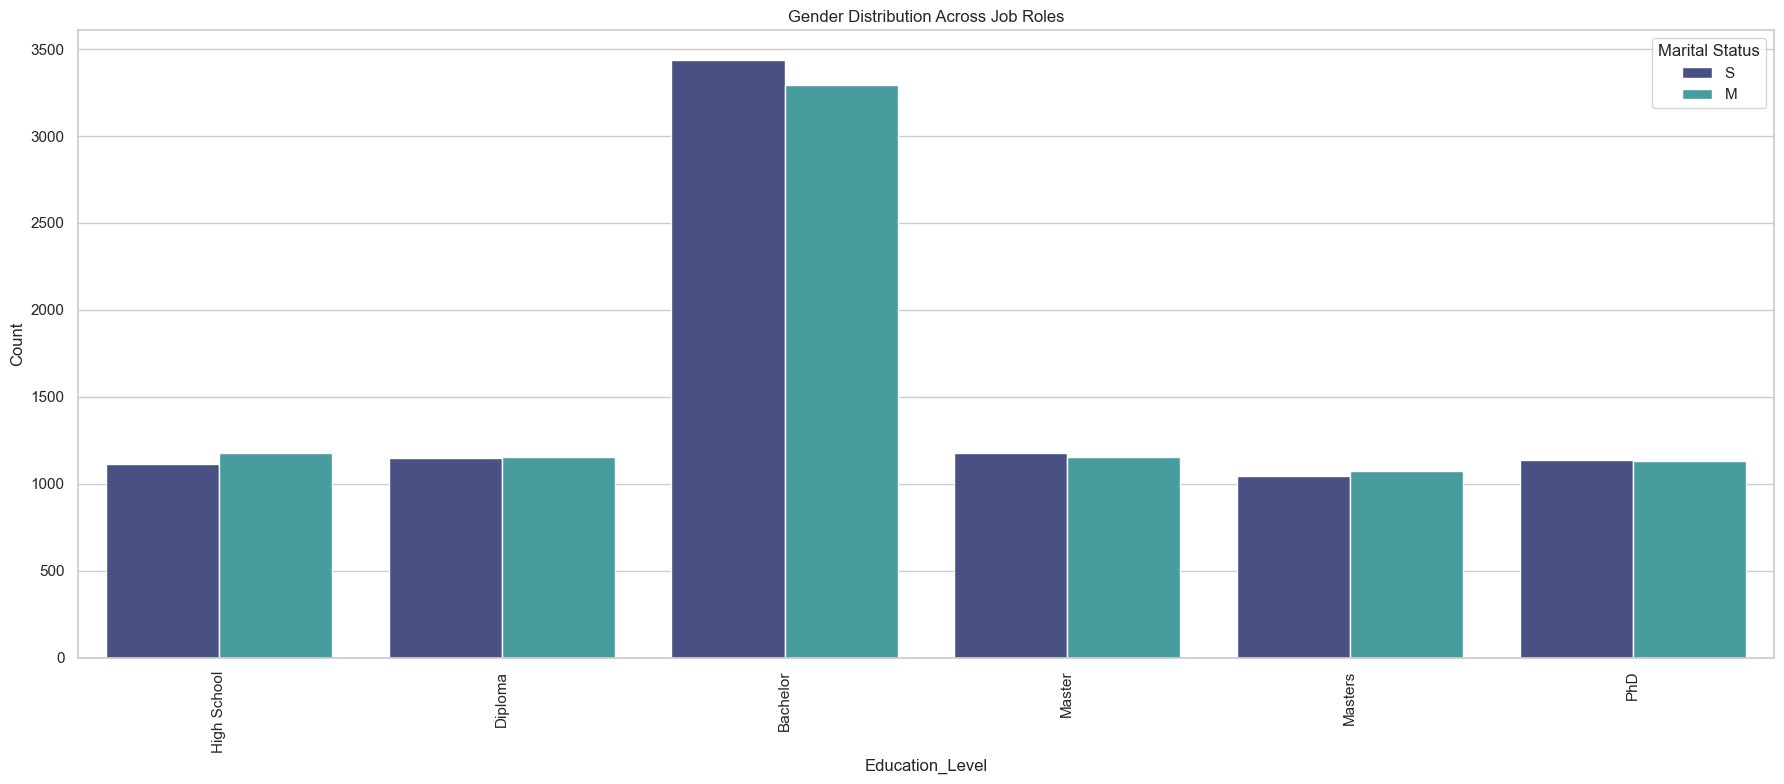

In [ ]:
plt.figure(figsize=(18, 8))
sns.countplot(data=df, x='Education_Level', hue='Marital_Status', palette='mako')
plt.title('Gender Distribution Across Job Roles')
plt.xlabel('Education_Level')
plt.ylabel('Count')
plt.legend(title='Marital Status')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()